# Part 4

- Réalisation d'une One Way Anova
- Réalisation de plusieurs régressions linéaires
- Conclusions

## Import librairies

In [1]:
import pickle

import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats import outliers_influence
from statsmodels.compat import lzip
import scipy.stats as st
import matplotlib.pyplot as plt

from descstats import Biva, MyPlot
from modelstats import OWAnova, linear_regression_analysis

pd.set_option('display.max_rows', None, 'display.max_columns', None)

- Repository de mon module DescStats : https://github.com/nicodesh/DescStats
- Repository de mon module ModelStats : https://github.com/nicodesh/ModelStats

In [2]:
with open("data/final_df.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    final_df = my_unpickler.load()
    
final_df.head()

,country,country_full,quantile,c_parent,population,gini,income_avg,income
0,ALB,Albanie,1,1,2991651,0.32141,2994.829902,728.89795
1,ALB,Albanie,1,1,2991651,0.32141,2994.829902,728.89795
2,ALB,Albanie,1,1,2991651,0.32141,2994.829902,728.89795
3,ALB,Albanie,1,1,2991651,0.32141,2994.829902,728.89795
4,ALB,Albanie,1,1,2991651,0.32141,2994.829902,728.89795


### ANOVA income ~ country

In [3]:
anova1 = OWAnova(final_df['country'], final_df['income'])
anova1.summary()

,mean,alpha,ni
ALB,2992.464164,0.000000,49878
ARG,5835.706108,2843.241944,49707
ARM,1628.229688,-1364.234475,49942
AUT,16630.764193,13638.300029,49837
AZE,2355.974703,-636.489460,49681
BEL,15011.921488,12019.457325,49797
BFA,916.812124,-2075.652039,49611
BGD,997.857589,-1994.606575,49665
BGR,4982.605391,1990.141227,49951
BIH,6327.912204,3335.448040,49884


,Eta Squared,F-Stat,P-Value
0,0.494787,49093.301137,0.0


/usr/local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:1591: RuntimeWarning: divide by zero encountered in log
  lPx = m/2 * np.log(m) + n/2 * np.log(n) + (n/2 - 1) * np.log(x)


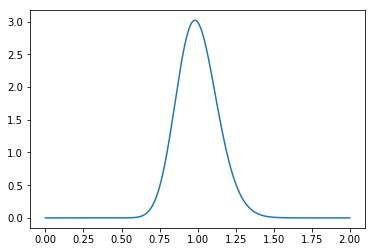

In [4]:
import matplotlib.pyplot as plt
f = anova1.fdistrib.pdf
x = np.linspace(0,2,1000)
plt.plot(x, f(x))

#### Interprétations

La P-Value est infiniment faible, le pays est donc un facteur d'influence statistiquement fiable.

Le modèle permet d'expliquer 50% de la somme des carrés. Ceci est un bon début, mais ce n'est pas suffisant pour pouvoir déterminer de manière fiable le revenu d'un individu lambda.

---

### ANOVA log(income) ~ country

In [12]:
anova2 = OWAnova(final_df['country'], np.log(final_df['income']))
anova2.summary()

,mean,alpha,ni
ALB,7.850761,0.000000,49878
ARG,8.300388,0.449627,49707
ARM,7.281864,-0.568896,49942
AUT,9.589358,1.738597,49837
AZE,7.603280,-0.247480,49681
BEL,9.476576,1.625815,49797
BFA,6.559078,-1.291683,49611
BGD,6.743678,-1.107083,49665
BGR,8.274383,0.423622,49951
BIH,8.538436,0.687675,49884


,Eta Squared,F-Stat,P-Value
0,0.729886,135451.837467,0.0


#### Interprétations

L'explication de la variance est bien meilleure sur le logarithme du revenu plutôt que sur le revenu. l'Eta carré atteint désormais 0.792

#### Régression linéaire : gini + income_avg => income

In [5]:
df = final_df[['gini', 'income_avg', 'income']]
X = df.iloc[:,:-1]
X = sm.add_constant(X)
y = df.iloc[:,-1]
reg_ols1 = sm.OLS(endog = y, exog = X).fit()
reg_ols1.summary()

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.774e+06
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:08:28   Log-Likelihood:            -5.7968e+07
No. Observations:             5664544   AIC:                         1.159e+08
Df Residuals:                 5664541   BIC:                         1.159e+08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2403     15.016      0.216      0.829     -26.190      32.671
gini         -10.7691     34.105     -0.316      0.752     -77.614      56.076
income_avg     0.9992      0.000   2194.114      0.000       0.998       1.000
==============================================================================
Omnibus:                  7097287.918   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1998208147.949
Skew:                           6.692   Prob(JB):                         0.00
Kurtosis:                      94.033   Cond. No.                     1.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Analyse de la régression

Pour mener l'analyse, j'utilise ma propre fonction d'analyse de regression lineaire que l'on retrouve dans mon module modelstats

[('Lagrande multiplier statistic', 163391.75631516986), ('p-value', 0.0), ('f-value', 84122.31308193503), ('f p-value', 0.0)]


/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro pvalue : 0.0


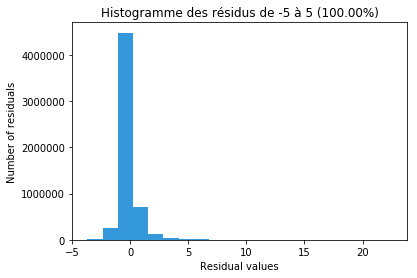

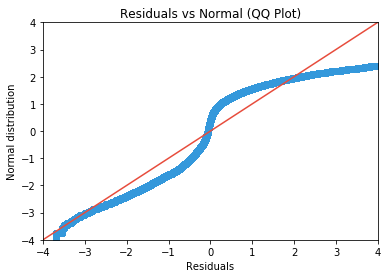

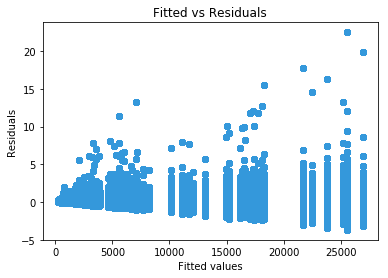

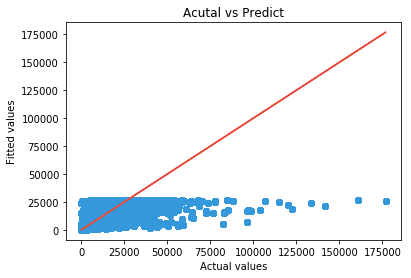

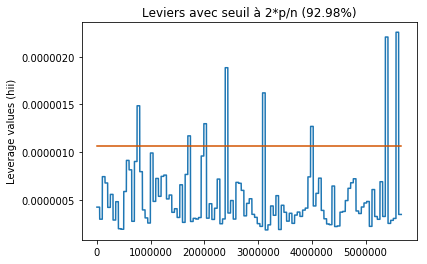

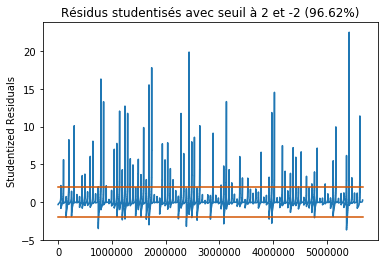

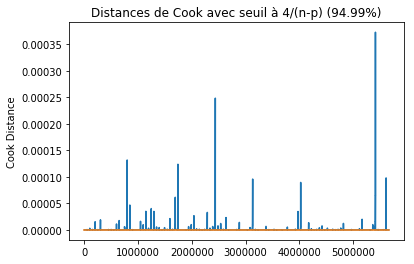

In [6]:
linear_regression_analysis(reg_ols1)

#### Interprétations

A ce stade, le modèle est égal à l'ANOVA. R2 étant environ égal à 50%.
L'indice de Gini ne semble pas significatif dans le modèle, sa p-valeur étant de 0,75.

L'analyse montre que les données ne sont pas linéaires.

#### Régression linéaire : gini + log(income_avg) => log(income)

In [7]:
gini = final_df['gini']
income_avg = np.log(final_df['income_avg'])
income = np.log(final_df['income'])

df = pd.concat([gini, income_avg, income], axis=1)

X = df.iloc[:,:-1]
X = sm.add_constant(X)
y = df.iloc[:,-1]
reg_ols2 = sm.OLS(endog = y, exog = X).fit()
reg_ols2.summary()

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 7.636e+06
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:10:36   Log-Likelihood:            -6.1905e+06
No. Observations:             5664544   AIC:                         1.238e+07
Df Residuals:                 5664541   BIC:                         1.238e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4962      0.003    168.140      0.000       0.490       0.502
gini          -1.6549      0.004   -467.189      0.000      -1.662      -1.648
income_avg     0.9863      0.000   3603.185      0.000       0.986       0.987
==============================================================================
Omnibus:                   378115.787   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1817734.245
Skew:                          -0.101   Prob(JB):                         0.00
Kurtosis:                       5.768   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analyse de la régression

[('Lagrande multiplier statistic', 338668.15852422867), ('p-value', 0.0), ('f-value', 180101.8016994754), ('f p-value', 0.0)]


/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro pvalue : 0.0


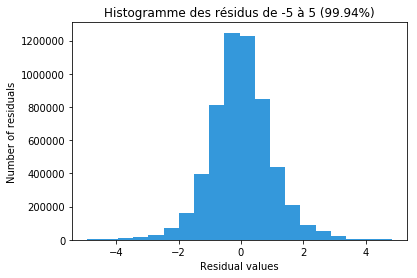

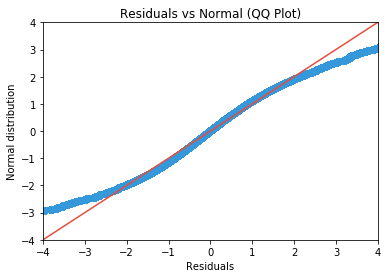

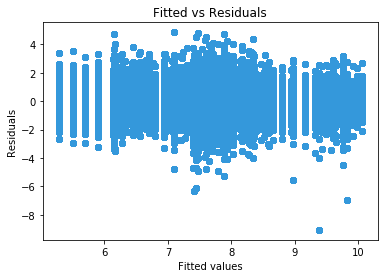

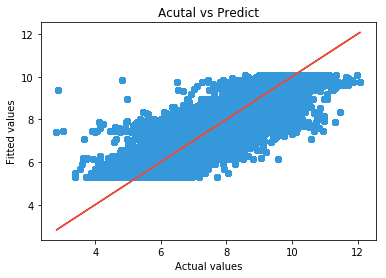

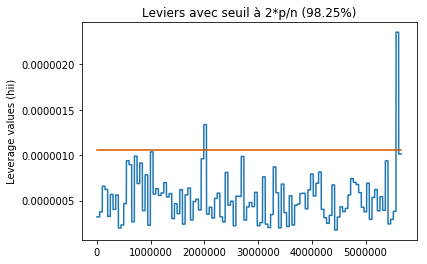

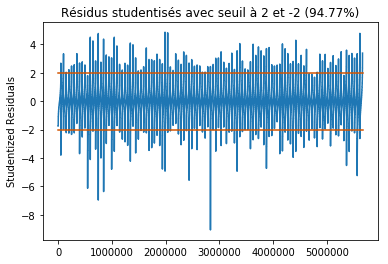

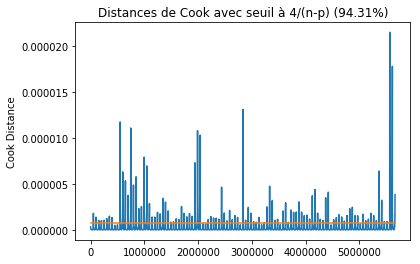

In [8]:
linear_regression_analysis(reg_ols2)

#### Interprétations

En prenant le logarithme du revenu moyen et le logarithme du revenu, le modèle est beaucoup plus performant. R2 est désormais à 0,73 et toutes les p-valeurs sont faibles, y compris pour l'indice de Gini.

#### Variance totale

A ce stade, on est capable d'expliquer 73% de la variance. On retrouve le même niveau d'explication que sur l'ANOVA log(income).

Les 27% restants peuvent être expliqués par :

- Les revenus des parents que nous n'avons pas encore inclus dans le modèle à ce stade
- Le niveau d'études
- L'âge
- La zone d'habitation : rurale ou citadine

#### Régression linéaire : gini + c_parent + log(income_avg) => log(income)

In [9]:
gini = final_df['gini']
c_parent = final_df['c_parent']
income_avg = np.log(final_df['income_avg'])
income = np.log(final_df['income'])

df = pd.concat([gini, c_parent, income_avg, income], axis=1)

X = df.iloc[:,:-1]
X = sm.add_constant(X)
y = df.iloc[:,-1]
reg_ols3 = sm.OLS(endog = y, exog = X).fit()
reg_ols3.summary()

/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                 6.627e+06
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:12:39   Log-Likelihood:            -5.6268e+06
No. Observations:             5664544   AIC:                         1.125e+07
Df Residuals:                 5664540   BIC:                         1.125e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0410      0.003    -15.118      0.000      -0.046      -0.036
gini          -1.6547      0.003   -515.985      0.000      -1.661      -1.648
c_parent       0.0106   9.52e-06   1116.806      0.000       0.011       0.011
income_avg     0.9864      0.000   3980.213      0.000       0.986       0.987
==============================================================================
Omnibus:                   399828.139   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1928198.814
Skew:                          -0.152   Prob(JB):                         0.00
Kurtosis:                       5.842   Cond. No.                         823.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Analyse de la régression linéaire

[('Lagrande multiplier statistic', 275234.05084673763), ('p-value', 0.0), ('f-value', 96430.05042035934), ('f p-value', 0.0)]


/usr/local/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro pvalue : 0.0


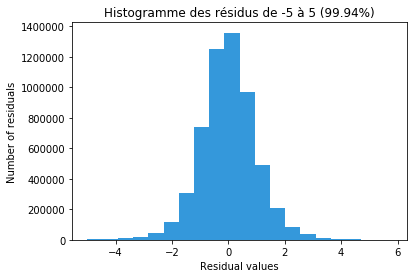

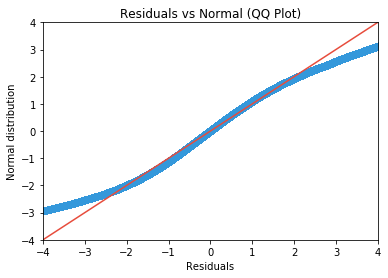

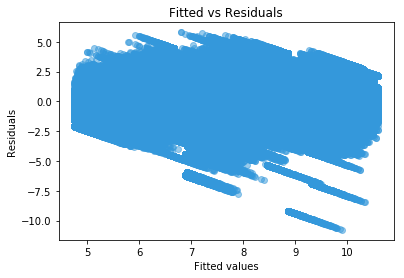

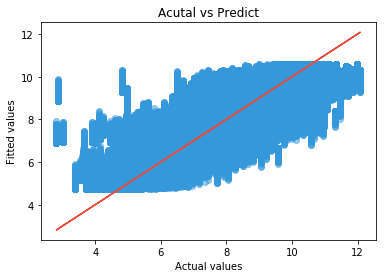

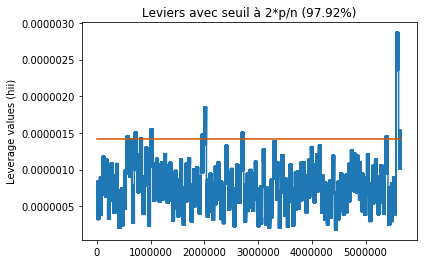

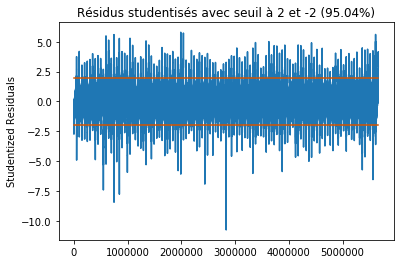

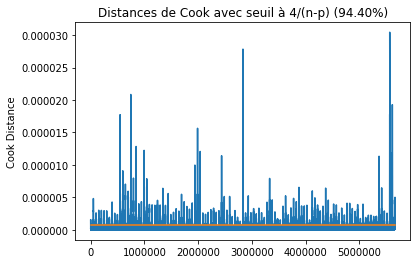

In [10]:
linear_regression_analysis(reg_ols3)

#### Interprétations

En incluant la classe de revenu des parents, on gagne 5 points sur le coefficient de détermination.

L'influence du revenu des parents sur le revenu de l'enfant est substantiel et est mis en évidence par le coefficient d'élasticité.

Désormais, il reste 22% non expliqué. Les 22% pourraient inclure :

- Le niveau d'études
- L'âge
- Le sexe
- La zone d'habitation : rurale ou citadine

Si on pouvait inclure ces facteurs là, le modèle gagnerait certainement grandement en performance, mais n'atteindra bien entendu jamais 100%.

Enfin, plus l’indice de gini est élevé, plus le salaire sera bas. Ceci est mis en évidence par le coefficient négatif au sein du modèle.